In [1]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment

%matplotlib inline

In [2]:
seed    = 12    # Initialize the seed
gpu     = True  # Enable True/False for the GPU 
device  = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") if gpu else "cpu"
print("Device: {}".format(device))

Device: cuda:0


In [3]:
env = UnityEnvironment(file_name='Tennis_Linux/Tennis.x86_64', seed=seed)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
brain_name  = env.brain_names[0]
print("Controlling Brain: {}".format(brain_name))

Controlling Brain: TennisBrain


In [5]:
# Reset the environment
env_info    = env.reset(train_mode=True)[brain_name]
# Number of agents
num_agents  = len(env_info.agents)
print('Number of agents: {}'.format(num_agents))
# Dimension of each action
action_dim  = env.brains[brain_name].vector_action_space_size
print('Action dimension: {}'.format(action_dim))
# State dimension
state_dim   = env_info.vector_observations.shape[1]
print('Observation dimension: {}'.format(state_dim))

Number of agents: 2
Action dimension: 2
Observation dimension: 24


In [6]:
from maddpg import MADDPG
maddpg = MADDPG(state_dim, action_dim, brain_name, num_agents, gpu=gpu, seed=seed)

In [7]:
scores = maddpg.train(env)

Episode 100	Score: 0.0000	Average Score: 0.0020
Episode 200	Score: 0.0000	Average Score: 0.0000
Episode 300	Score: 0.0000	Average Score: 0.0010
Episode 400	Score: 0.0000	Average Score: 0.0080
Episode 500	Score: 0.0000	Average Score: 0.0030
Episode 600	Score: 0.0000	Average Score: 0.0209
Episode 700	Score: 0.1000	Average Score: 0.0329
Episode 800	Score: 0.1000	Average Score: 0.0523
Episode 900	Score: 0.1000	Average Score: 0.0726
Episode 1000	Score: 0.0000	Average Score: 0.0686
Episode 1100	Score: 0.1000	Average Score: 0.0996
Episode 1200	Score: 0.2000	Average Score: 0.1487
Episode 1300	Score: 2.0000	Average Score: 0.3090
Episode 1400	Score: 0.6000	Average Score: 0.4046
Episode 1500	Score: 0.1000	Average Score: 0.4761
Episode 1600	Score: 0.1000	Average Score: 0.4658
Episode 1700	Score: 0.9000	Average Score: 0.5182
Episode 1800	Score: 0.2000	Average Score: 0.6102
Episode 1900	Score: 2.6000	Average Score: 0.5730
Episode 2000	Score: 0.2000	Average Score: 0.5785
Episode 2100	Score: 0.3000	Av

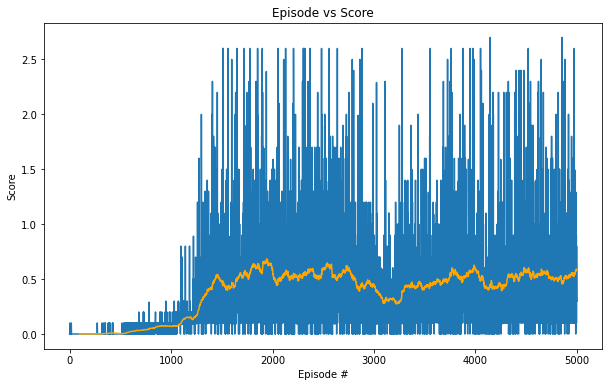

In [12]:
# Plot the scores
import matplotlib.pyplot as plt

window = 100

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(scores)), scores)

rolling_avg = np.convolve(scores, np.ones(window)/window, mode='valid')
plt.plot(np.arange(window-1, len(scores)), rolling_avg, color='orange')
plt.title('Episode vs Score')
plt.xlabel('Episode #')
plt.ylabel('Score')
plt.show()

plt.show()

In [9]:
env.close()